# Running Back Regression (Bayesian)

In [12]:
# For matrices and vectors
import numpy as np
# For importing libraries for polynomial transform
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
# For creating pipeline
from sklearn.pipeline import make_pipeline
# For visualizations
from matplotlib import pyplot as plt
import seaborn as sns
#So that matlib plots are inside the notebook
%matplotlib inline

In [13]:
import pandas as pd
CSV = "rbs.csv"
REGRESSORS = ["Rush_Att","Rush_TD"]
TARGET = "Rush_Yds"
POLYNOMIAL_DEGREE = 4


data = pd.read_csv(CSV,thousands = ',')
data = data.loc[data.Season >= 2019]
data = data.sort_values(by = [REGRESSORS[0]])

In [14]:
X = data[REGRESSORS].astype(int).to_numpy()
y = data[[TARGET]].to_numpy()

X_plot = np.stack([np.linspace(np.amin(X[:,i]),np.amax(X[:,i]),500) for i in range(len(REGRESSORS))]).transpose()

In [15]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [16]:
brr_poly = make_pipeline(
    PolynomialFeatures(degree=POLYNOMIAL_DEGREE, include_bias=False),
    BayesianRidge(),
)

brr_poly.fit(Xtrain, ytrain.ravel()); #could put with above

# Here we want to find our prediction line
y_line_brr, y_line_brr_std = brr_poly.predict(X_plot, return_std=True)

In [17]:
print('Accuracy: %.3f%% ' % (brr_poly.score(Xtest,ytest)*100))

Accuracy: 94.475% 


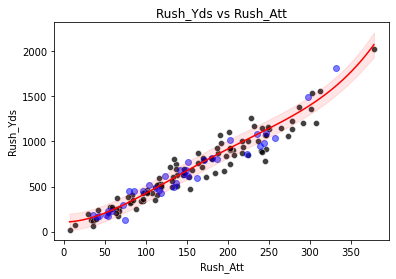

In [25]:
VISUALIZE_REGRESSOR_INDEX = 0
# Only want to work with the regressor we are visualizing
i = VISUALIZE_REGRESSOR_INDEX 
X_train_reg = Xtrain.transpose()[i,:].reshape(-1,1)
X_test_reg = Xtest.transpose()[i,:].reshape(-1,1)
X_plot_reg = X_plot.transpose()[i,:].reshape(-1,1)
trainDataFrame = pd.DataFrame(np.hstack((X_train_reg, ytrain)),columns = [REGRESSORS[i],TARGET])
sx = sns.scatterplot(trainDataFrame, x = REGRESSORS[i], y = TARGET, color="black", alpha=0.75)
sx.scatter(X_test_reg,ytest,color="blue", alpha=0.5)
sx.plot(X_plot_reg, y_line_brr, color="red", label="BayesianRidge Line with polynomial features")
sx.fill_between(
    X_plot_reg.ravel(),
    y_line_brr - y_line_brr_std,
    y_line_brr + y_line_brr_std,
    color="red",
    alpha=0.10,
);
sx.set(title =   TARGET+ " vs "+ REGRESSORS[i]);